This Notebook would guide you to reproduce the results presented in our final report. 

In [2]:
# Reproduce plots in the paper

import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm


from generate_maze import gen_polygonal_path_maze, add_random_obstacles
from visualize_path import visualize_maze
from train import Maze, train_generalized_maze

Figure 1, 2, 3, 4: Visualize mazes with different sizes N, number of paths P, and obstacle ratio R

You can find the generated mazes visualized in the `figure_1,figure2,figure3,figure4` folder. You may refer to the image names, which contain the parameter values of N, P and R, to find the images associated with each Figure.

Figure 1: 
- `maze_obstacles_N=5_P=1_R=1.0.png`
- `maze_obstacles_N=10_P=1_R=1.0.png`
- `maze_obstacles_N=15_P=1_R=1.0.png`

Figure 2: 
- `maze_obstacles_N=20_P=1_R=1.0.png`
- `maze_obstacles_N=20_P=2_R=1.0.png`
- `maze_obstacles_N=20_P=4_R=1.0.png`

Figure 3: 
- `maze_obstacles_N=25_P=1_R=1.0.png`
- `maze_obstacles_N=25_P=1_R=0.8.png`
- `maze_obstacles_N=25_P=1_R=0.6.png`

Figure 4: 
- `maze_obstacles_N=5_P=1_R=0.8.png`
- `maze_obstacles_N=15_P=2_R=0.7.png`
- `maze_obstacles_N=30_P=3_R=0.5.png`

Note: The mazes generated by yourself may not be exactly the same as the mazes shown in the report due to the randomness nature when generating these mazes.  

In [52]:
directory = "figure_1"
if not os.path.exists(directory):
    os.makedirs(directory)
for N in [25]:
    for P in [1]:
        maze = gen_polygonal_path_maze(N,P)
        for R in [1.0]:
            new_maze = maze.copy()
            new_maze = add_random_obstacles(new_maze, R)
            visualize_maze(Maze(new_maze), f"{directory}/maze_obstacles_N={N}_P={P}_R={R}.png")

In [53]:
directory = "figure_2"
if not os.path.exists(directory):
    os.makedirs(directory)
for N in [20]:
    for P in [1, 2, 4]:
        maze = gen_polygonal_path_maze(N,P)
        for R in [1.0]:
            new_maze = maze.copy()
            new_maze = add_random_obstacles(new_maze, R)
            visualize_maze(Maze(new_maze), f"{directory}/maze_obstacles_N={N}_P={P}_R={R}.png")

In [54]:
directory = "figure_3"
if not os.path.exists(directory):
    os.makedirs(directory)
for N in [20]:
    for P in [1]:
        maze = gen_polygonal_path_maze(N,P)
        for R in [1.0, 0.8, 0.6]:
            new_maze = maze.copy()
            new_maze = add_random_obstacles(new_maze, R)
            visualize_maze(Maze(new_maze), f"{directory}/maze_obstacles_N={N}_P={P}_R={R}.png")

In [55]:
directory = "figure_4"
if not os.path.exists(directory):
    os.makedirs(directory)

maze = gen_polygonal_path_maze(5,1)
new_maze = maze.copy()
new_maze = add_random_obstacles(new_maze, 0.8)
visualize_maze(Maze(new_maze), f"{directory}/maze_obstacles_N={5}_P={1}_R={0.8}.png")

maze = gen_polygonal_path_maze(15,2)
new_maze = maze.copy()
new_maze = add_random_obstacles(new_maze, 0.7)
visualize_maze(Maze(new_maze), f"{directory}/maze_obstacles_N={15}_P={2}_R={0.7}.png")

maze = gen_polygonal_path_maze(30,3)
new_maze = maze.copy()
new_maze = add_random_obstacles(new_maze, 0.5)
visualize_maze(Maze(new_maze), f"{directory}/maze_obstacles_N={30}_P={3}_R={0.5}.png")


Figure 5 and Figure 6: The training and testing score evolution during training process. 

You may find the plots in the `figure_5` folder: 
- `training_scores_N=10_P=1_R=0.5_trainsize=5_testsize=5_epochs=500.png`
- `testing_scores_N=10_P=1_R=0.5_trainsize=5_testsize=5_epochs=500.png`

You may find the plots of visualized paths in Figure 6 in the folder: `N=10_P=1_R=0.5_trainsize=5_testsize=5_epochs=500`
- `maze_path_epoch_0_test_0.png`
- `maze_path_epoch_20_test_0.png`
- `maze_path_epoch_100_test_0.png`
- `maze_path_epoch_250_test_0.png`
- `maze_path_epoch_400_test_0.png`
- `maze_path_epoch_500_test_0.png`

In [ ]:
# Training
train_generalized_maze(10, 1, 0.5, train_size=5, test_size=5, num_epochs=500, visualize=True)

In [56]:
N = 10
P = 1
R = 0.5
training_size = 5
testing_size = 5
num_epochs = 500
directory = f"N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}"
recorded_epochs = np.load(f"{directory}/recorded_epochs.npy")
training_scores = np.load(f"{directory}/training_scores.npy")
testing_scores = np.load(f"{directory}/testing_scores.npy")

# create directory for figure 5 if it doesn't exist
directory = "figure_5"
if not os.path.exists(directory):
    os.makedirs(directory)

plt.plot(recorded_epochs, testing_scores, label=f"N={N}_P={P}_R={R}")
plt.xlabel("Number of epochs")
plt.ylabel("Testing Score")
plt.legend()
plt.savefig(f"{directory}/testing_scores_N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}.png", dpi=300)
plt.close()

plt.plot(recorded_epochs, training_scores, label=f"N={N}_P={P}_R={R}")
plt.xlabel("Number of epochs")
plt.ylabel("Training Score")
plt.legend()
plt.savefig(f"{directory}/training_scores_N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}.png", dpi=300)
plt.close()

Figure 7: We have one plot

- `FigN_testing_scores_N=50_P=3_R=0.5_trainsize=10_testsize=10_epochs=1000.png`

In [ ]:
# Training

Ns = [5,10,15,20,25,30,35,40,45,50]
Ps = [3]
Rs = [0.5]
training_size = 10
testing_size = 10
num_epochs = 1000

for N in Ns:
    for P in Ps:
        for R in Rs:
            train_generalized_maze(N, P, R, training_size, testing_size, num_epochs, visualize=False)

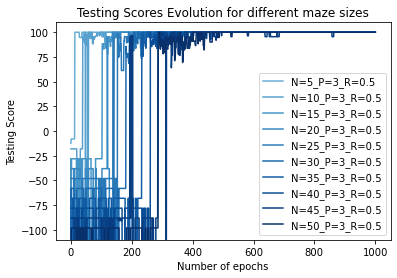

In [11]:
# Run first plot.

cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.5, 1, len(Ns))]

for N, color in zip(Ns, colors):
    for P in Ps:
        for R in Rs:
            directory = f"N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}"
            recorded_epochs = np.load(f"{directory}/recorded_epochs.npy")
            training_scores = np.load(f"{directory}/training_scores.npy")
            testing_scores = np.load(f"{directory}/testing_scores.npy")
            plt.plot(recorded_epochs, testing_scores, label=f"N={N}_P={P}_R={R}", color=color)

plt.xlabel("Number of epochs")
plt.ylabel("Testing Score")
plt.ylim(-110, 110)
plt.legend()
plt.title(f"Testing Scores Evolution for different maze sizes")
plt.savefig(f"FigN_testing_scores_N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}.png", dpi=300)

Figure 8: We have two separate plots to compare different values of R:

- `FigP_testing_scores_N=20_P=3_R=0.5_trainsize=20_testsize=10_epochs=300.png`
- `FigP_testing_scores_N=20_P=5_R=0.5_trainsize=20_testsize=10_epochs=300.png`

In [ ]:
# Training
Ns = [20]
Ps = [1, 2, 3, 4, 5]
Rs = [0.5]
training_size = 20
testing_size = 10
num_epochs = 300

# training the agents
for N in Ns:
    for P in Ps:
        for R in Rs:
            train_generalized_maze(N, P, R, training_size, testing_size, num_epochs, visualize=False)

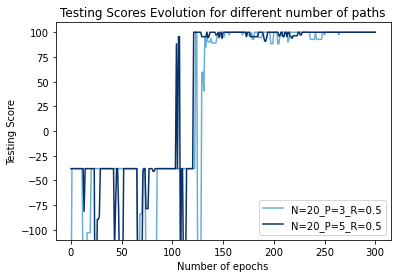

In [45]:
# Run first plot.
Ps = [3,5] # Change this to obtain plots for different combinations of P
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.5, 1, len(Ps))]

for N in Ns:
    for P, color in zip(Ps, colors):
        for R in Rs:
            directory = f"N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}"
            recorded_epochs = np.load(f"{directory}/recorded_epochs.npy")
            training_scores = np.load(f"{directory}/training_scores.npy")
            testing_scores = np.load(f"{directory}/testing_scores.npy")
            plt.plot(recorded_epochs, testing_scores, label=f"N={N}_P={P}_R={R}", color=color)

plt.xlabel("Number of epochs")
plt.ylabel("Testing Score")
plt.ylim(-110,110)
plt.legend()
plt.title(f"Testing Scores Evolution for different number of paths")
plt.savefig(f"FigP_testing_scores_N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}.png", dpi=300)

In [ ]:
# Run second plot.

Ps = [1,3] # uncomment this to obtain plots for different combinations of P
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.5, 1, len(Ps))]

for N in Ns:
    for P, color in zip(Ps, colors):
        for R in Rs:
            directory = f"N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}"
            recorded_epochs = np.load(f"{directory}/recorded_epochs.npy")
            training_scores = np.load(f"{directory}/training_scores.npy")
            testing_scores = np.load(f"{directory}/testing_scores.npy")
            plt.plot(recorded_epochs, testing_scores, label=f"N={N}_P={P}_R={R}", color=color)

plt.xlabel("Number of epochs")
plt.ylabel("Testing Score")
plt.ylim(-110,110)
plt.legend()
plt.title(f"Testing Scores Evolution for different number of paths")
plt.savefig(f"FigP_testing_scores_N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}.png", dpi=300)

Figure 9: We have two separate plots to compare different values of R:

- `FigR_testing_scores_N=40_P=3_R=0.5_trainsize=10_testsize=10_epochs=1000.png`
- `FigR_testing_scores_N=40_P=3_R=0.9_trainsize=10_testsize=10_epochs=1000.png`

In [ ]:
# training
Ns = [40]
Ps = [3]
Rs = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
training_size = 10
testing_size = 10
num_epochs = 1000

for N in Ns:
    for P in Ps:
        for R in Rs:
            train_generalized_maze(N, P, R, training_size, testing_size, num_epochs, visualize=False)

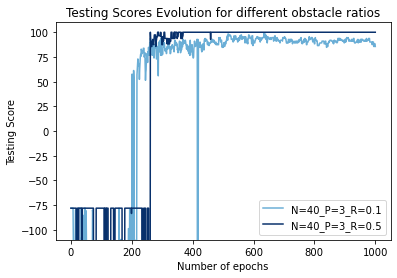

In [43]:
# Run first plot.

Rs = [0.1, 0.5] # Change this to obtain plots for different combinations of R
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.5, 1, len(Rs))]

for N in Ns:
    for P in Ps:
        for R, color in zip(Rs, colors):
            directory = f"N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}"
            recorded_epochs = np.load(f"{directory}/recorded_epochs.npy")
            training_scores = np.load(f"{directory}/training_scores.npy")
            testing_scores = np.load(f"{directory}/testing_scores.npy")
            plt.plot(recorded_epochs, testing_scores, label=f"N={N}_P={P}_R={R}", color=color)

plt.xlabel("Number of epochs")
plt.ylabel("Testing Score")
plt.ylim(-110,110)
plt.legend()
plt.title(f"Testing Scores Evolution for different obstacle ratios")
plt.savefig(f"FigR_testing_scores_N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}.png", dpi=300)

In [ ]:
# Run second plot.

Rs = [0.5, 0.9] # <--- Uncomment this to obtain plots for different combinations of R
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.5, 1, len(Rs))]

for N in Ns:
    for P in Ps:
        for R, color in zip(Rs, colors):
            directory = f"N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}"
            recorded_epochs = np.load(f"{directory}/recorded_epochs.npy")
            training_scores = np.load(f"{directory}/training_scores.npy")
            testing_scores = np.load(f"{directory}/testing_scores.npy")
            plt.plot(recorded_epochs, testing_scores, label=f"N={N}_P={P}_R={R}", color=color)

plt.xlabel("Number of epochs")
plt.ylabel("Testing Score")
plt.ylim(-110,110)
plt.legend()
plt.title(f"Testing Scores Evolution for different obstacle ratios")
plt.savefig(f"FigR_testing_scores_N={N}_P={P}_R={R}_trainsize={training_size}_testsize={testing_size}_epochs={num_epochs}.png", dpi=300)